# Superstore Dataset - Comprehensive Exploratory Data Analysis

**Author:** Akash kumar P R
**Date:** June 2025
**Objective:** Comprehensive EDA of Superstore sales data to uncover business insights and patterns

## Table of Contents
1. [Data Loading and Initial Exploration](#1-data-loading-and-initial-exploration)
2. [Data Cleaning and Preprocessing](#2-data-cleaning-and-preprocessing)
3. [Univariate Analysis](#3-univariate-analysis)
4. [Bivariate and Multivariate Analysis](#4-bivariate-and-multivariate-analysis)
5. [Time Series Analysis](#5-time-series-analysis)
6. [Geographic Analysis](#6-geographic-analysis)
7. [Customer Segmentation Analysis](#7-customer-segmentation-analysis)
8. [Product Performance Analysis](#8-product-performance-analysis)
9. [Key Business Insights](#9-key-business-insights)
10. [Recommendations](#10-recommendations)

---

## 1. Data Loading and Initial Exploration

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta
from scipy import stats
import missingno as msno

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("📊 Libraries imported successfully!")

📊 Libraries imported successfully!


In [5]:
# Load the dataset
df = pd.read_csv('data/superstore.csv')

print("🔍 Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

🔍 Dataset loaded successfully!
Dataset shape: (9800, 18)
Memory usage: 9.95 MB


In [6]:
# Initial data exploration
print("📋 DATASET OVERVIEW")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n📊 FIRST 5 ROWS:")
display(df.head())

📋 DATASET OVERVIEW
Shape: (9800, 18)
Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']

📊 FIRST 5 ROWS:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
# Data types and basic info
print("🔍 DATA TYPES AND INFO:")
print("=" * 30)
df.info()

print("\n📈 STATISTICAL SUMMARY:")
print("=" * 30)
display(df.describe())

🔍 DATA TYPES AND INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null 

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## 2. Data Cleaning and Preprocessing

🔍 MISSING VALUES ANALYSIS:


,Missing Count,Percentage
Postal Code,11,0.112245


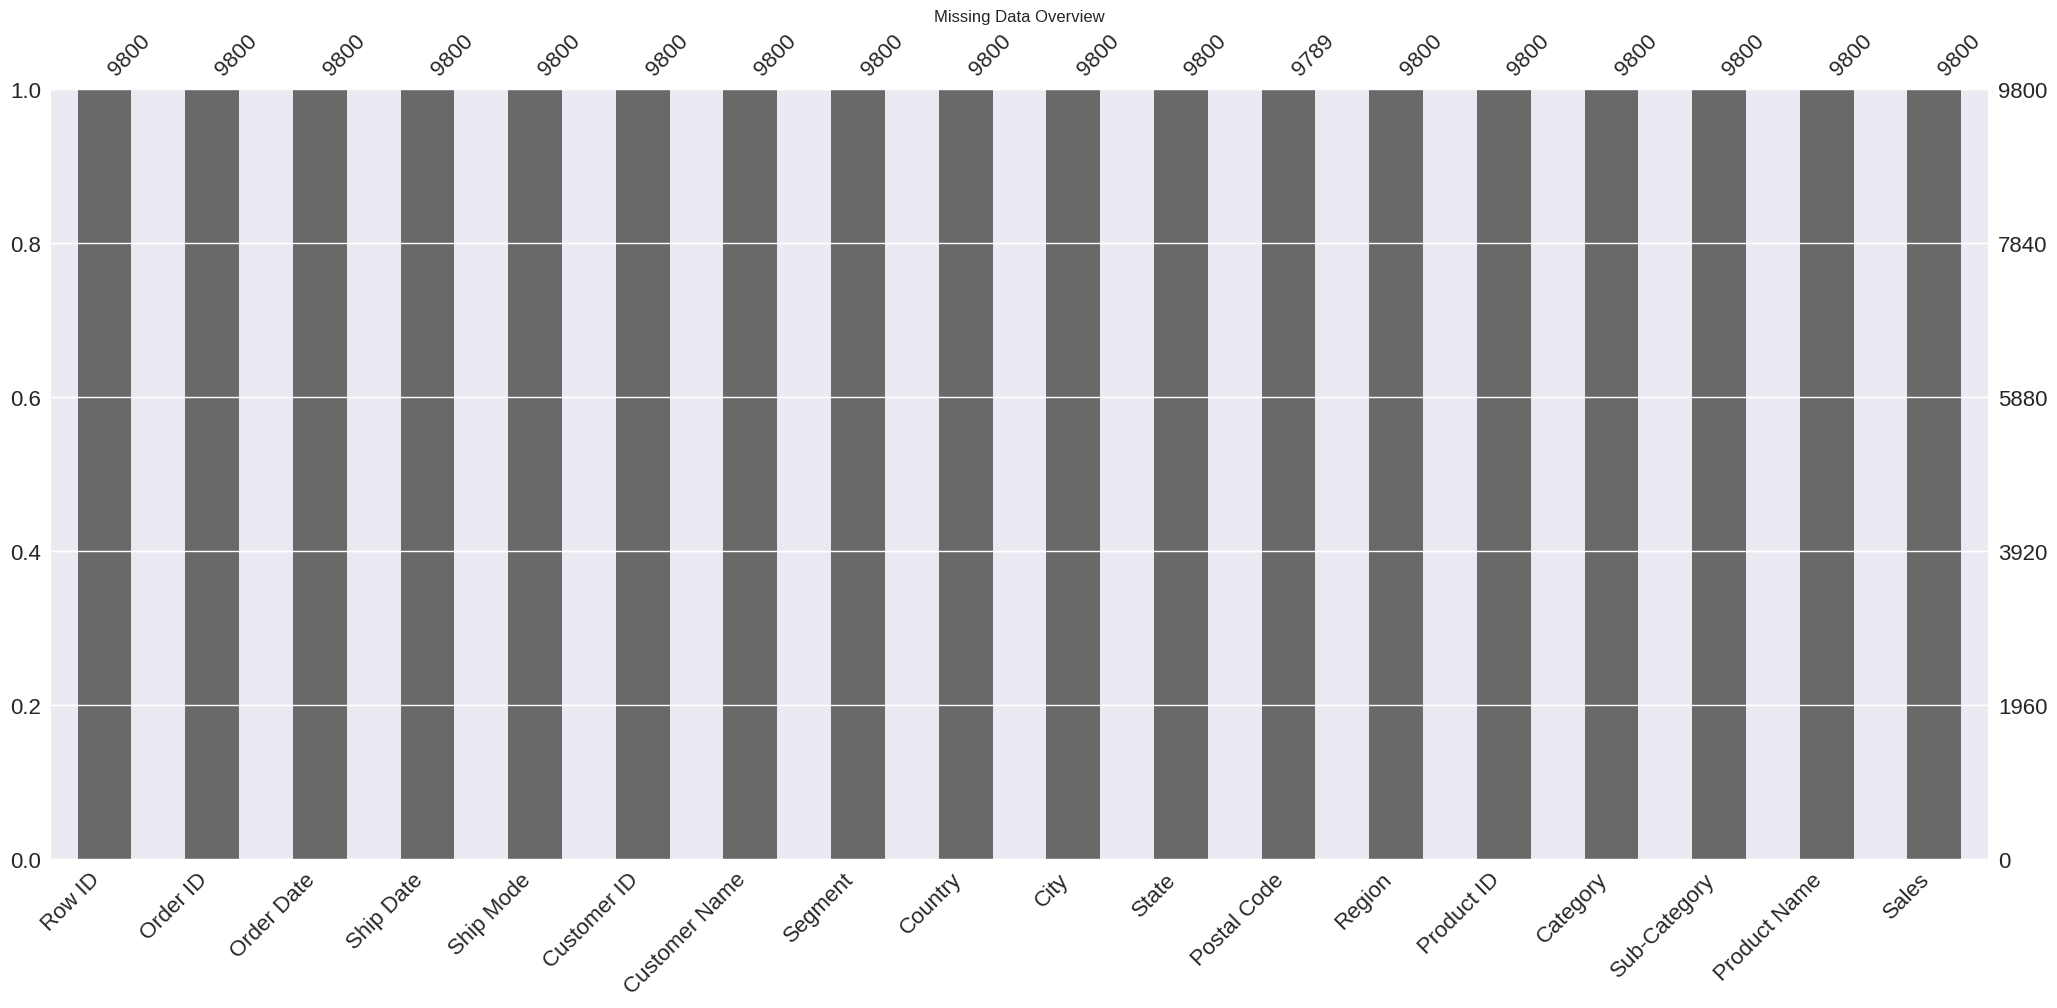

In [8]:
# Check for missing values
print("🔍 MISSING VALUES ANALYSIS:")
print("=" * 30)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
display(missing_df)

# Visualize missing data
if not missing_df.empty:
    plt.figure(figsize=(12, 6))
    msno.bar(df)
    plt.title('Missing Data Overview')
    plt.show()
else:
    print("✅ No missing values found!")

In [9]:
# Check for duplicates
print("🔍 DUPLICATE VALUES ANALYSIS:")
print("=" * 30)
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

if duplicates > 0:
    print("Removing duplicates...")
    df = df.drop_duplicates()
    print(f"✅ Removed {duplicates} duplicate rows")
    print(f"New dataset shape: {df.shape}")
else:
    print("✅ No duplicate rows found!")

🔍 DUPLICATE VALUES ANALYSIS:
Total duplicate rows: 0
✅ No duplicate rows found!


In [10]:
# Data type conversions
print("🔧 DATA TYPE CONVERSIONS:")
print("=" * 30)

# Convert date columns
date_columns = ['Order Date', 'Ship Date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], format='%d/%m/%Y')
        print(f"✅ Converted {col} to datetime")

# Create additional date features
if 'Order Date' in df.columns:
    df['Order Year'] = df['Order Date'].dt.year
    df['Order Month'] = df['Order Date'].dt.month
    df['Order Quarter'] = df['Order Date'].dt.quarter
    df['Order Day of Week'] = df['Order Date'].dt.day_name()
    df['Order Week'] = df['Order Date'].dt.isocalendar().week

# Calculate delivery time
if 'Order Date' in df.columns and 'Ship Date' in df.columns:
    df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

print("✅ Date features created successfully!")

🔧 DATA TYPE CONVERSIONS:
✅ Converted Order Date to datetime
✅ Converted Ship Date to datetime
✅ Date features created successfully!


In [11]:
# Data quality checks
print("🔍 DATA QUALITY CHECKS:")
print("=" * 30)

# Check for negative sales/profit
if 'Sales' in df.columns:
    negative_sales = (df['Sales'] < 0).sum()
    print(f"Negative sales records: {negative_sales}")

# Check date consistency
if 'Order Date' in df.columns and 'Ship Date' in df.columns:
    inconsistent_dates = (df['Ship Date'] < df['Order Date']).sum()
    print(f"Inconsistent dates (Ship before Order): {inconsistent_dates}")

# Check for outliers in Sales
if 'Sales' in df.columns:
    Q1 = df['Sales'].quantile(0.25)
    Q3 = df['Sales'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))).sum()
    print(f"Sales outliers (IQR method): {outliers}")

print("\n📊 CLEANED DATASET INFO:")
print(f"Final shape: {df.shape}")
print(f"Date range: {df['Order Date'].min()} to {df['Order Date'].max()}")

🔍 DATA QUALITY CHECKS:
Negative sales records: 0
Inconsistent dates (Ship before Order): 0
Sales outliers (IQR method): 1145

📊 CLEANED DATASET INFO:
Final shape: (9800, 24)
Date range: 2015-01-03 00:00:00 to 2018-12-30 00:00:00


## 3. Univariate Analysis

📊 CATEGORICAL VARIABLES ANALYSIS:

Category:
  Unique values: 3
  Top 3: {'Office Supplies': 5909, 'Furniture': 2078, 'Technology': 1813}

Sub-Category:
  Unique values: 17
  Top 3: {'Binders': 1492, 'Paper': 1338, 'Furnishings': 931}

Segment:
  Unique values: 3
  Top 3: {'Consumer': 5101, 'Corporate': 2953, 'Home Office': 1746}

Region:
  Unique values: 4
  Top 3: {'West': 3140, 'East': 2785, 'Central': 2277}

Ship Mode:
  Unique values: 4
  Top 3: {'Standard Class': 5859, 'Second Class': 1902, 'First Class': 1501}


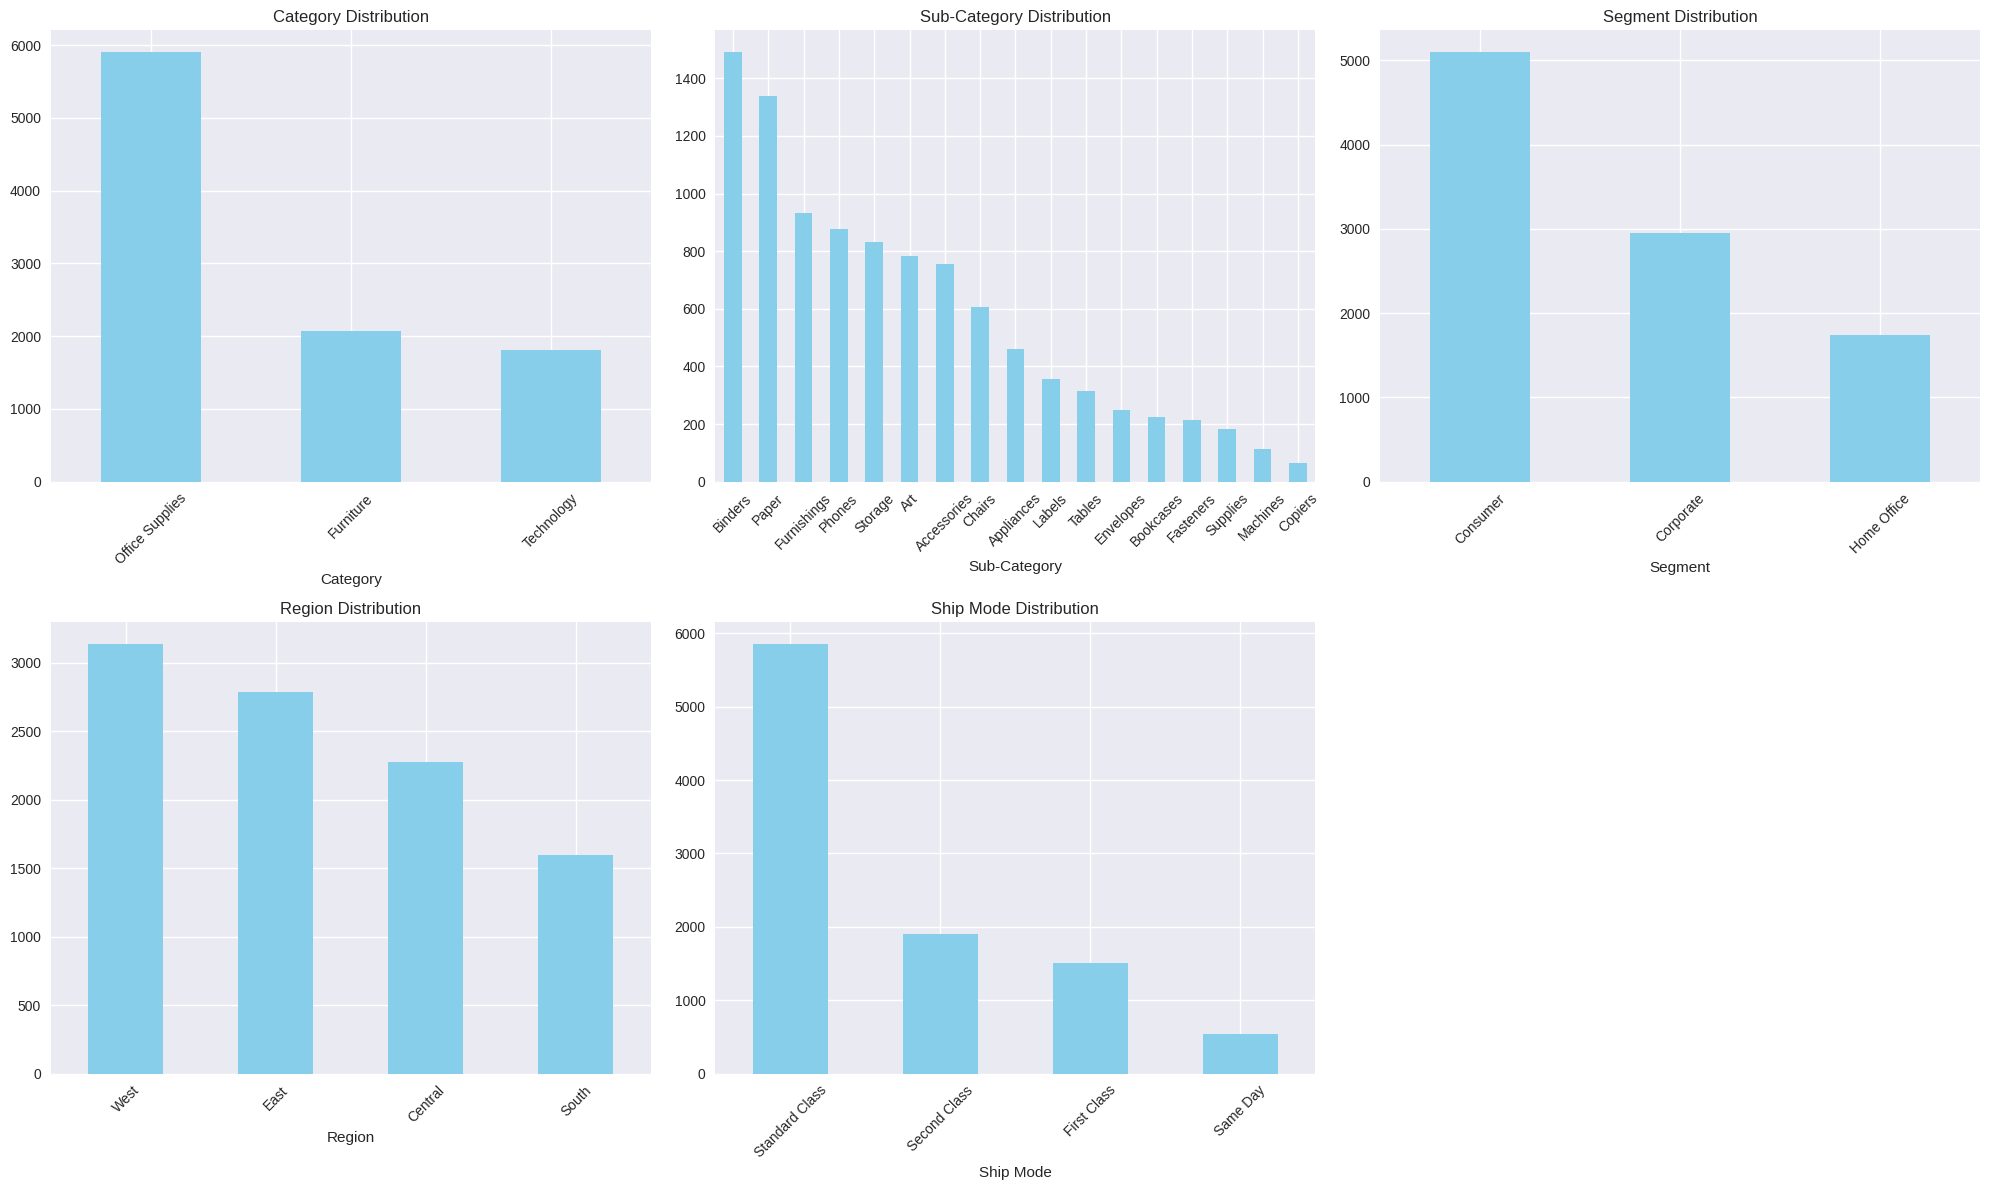

In [12]:
# Categorical variables analysis
print("📊 CATEGORICAL VARIABLES ANALYSIS:")
print("=" * 40)

categorical_cols = ['Category', 'Sub-Category', 'Segment', 'Region', 'Ship Mode']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if col in df.columns:
        value_counts = df[col].value_counts()

        # Print summary
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Top 3: {value_counts.head(3).to_dict()}")

        # Plot
        value_counts.plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_title(f'{col} Distribution')
        axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

📊 NUMERICAL VARIABLES ANALYSIS:
Statistical Summary:


,Sales,Delivery Days
count,9800.000000,9800.000000
mean,230.769059,3.961122
std,626.651875,1.749614
min,0.444000,0.000000
25%,17.248000,3.000000
50%,54.490000,4.000000
75%,210.605000,5.000000
max,22638.480000,7.000000


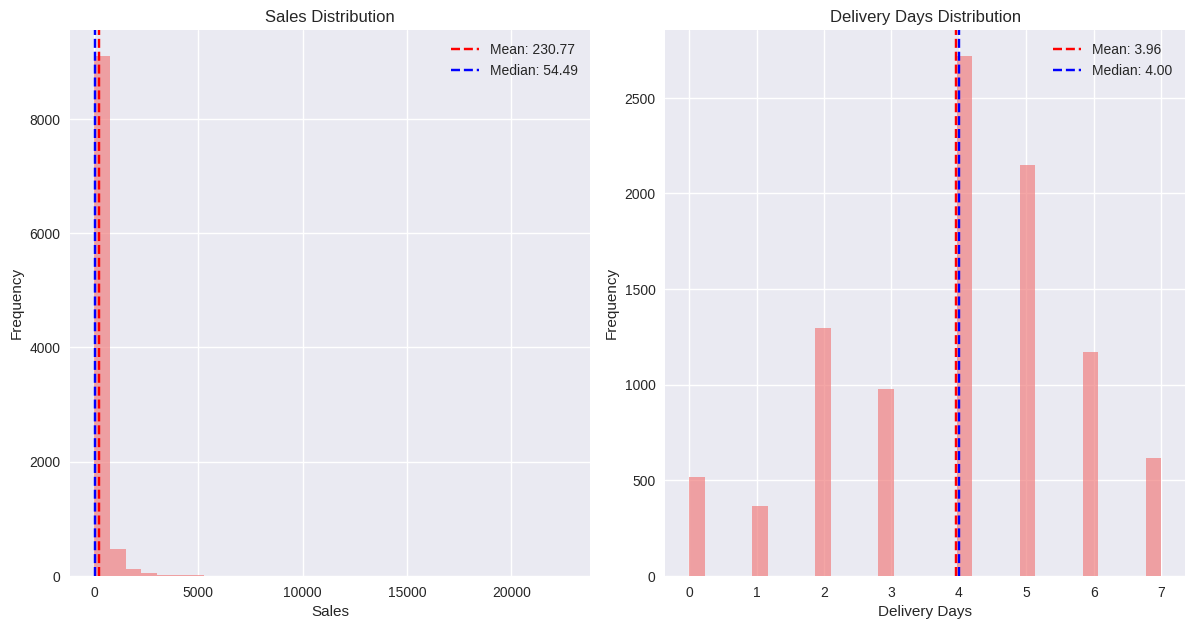

In [13]:
# Numerical variables analysis
print("📊 NUMERICAL VARIABLES ANALYSIS:")
print("=" * 40)

numerical_cols = ['Sales', 'Delivery Days']
if 'Quantity' in df.columns:
    numerical_cols.append('Quantity')
if 'Discount' in df.columns:
    numerical_cols.append('Discount')
if 'Profit' in df.columns:
    numerical_cols.append('Profit')

# Statistical summary
print("Statistical Summary:")
display(df[numerical_cols].describe())

# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:6]):
    if col in df.columns:
        # Histogram
        df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='lightcoral')
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

        # Add statistics text
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.2f}')
        axes[i].legend()

# Remove empty subplots
for j in range(len(numerical_cols), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

📦 OUTLIER ANALYSIS:

Sales:
  Outliers: 1145 (11.68%)
  Range: [-272.79, 500.64]

Delivery Days:
  Outliers: 0 (0.00%)
  Range: [0.00, 8.00]


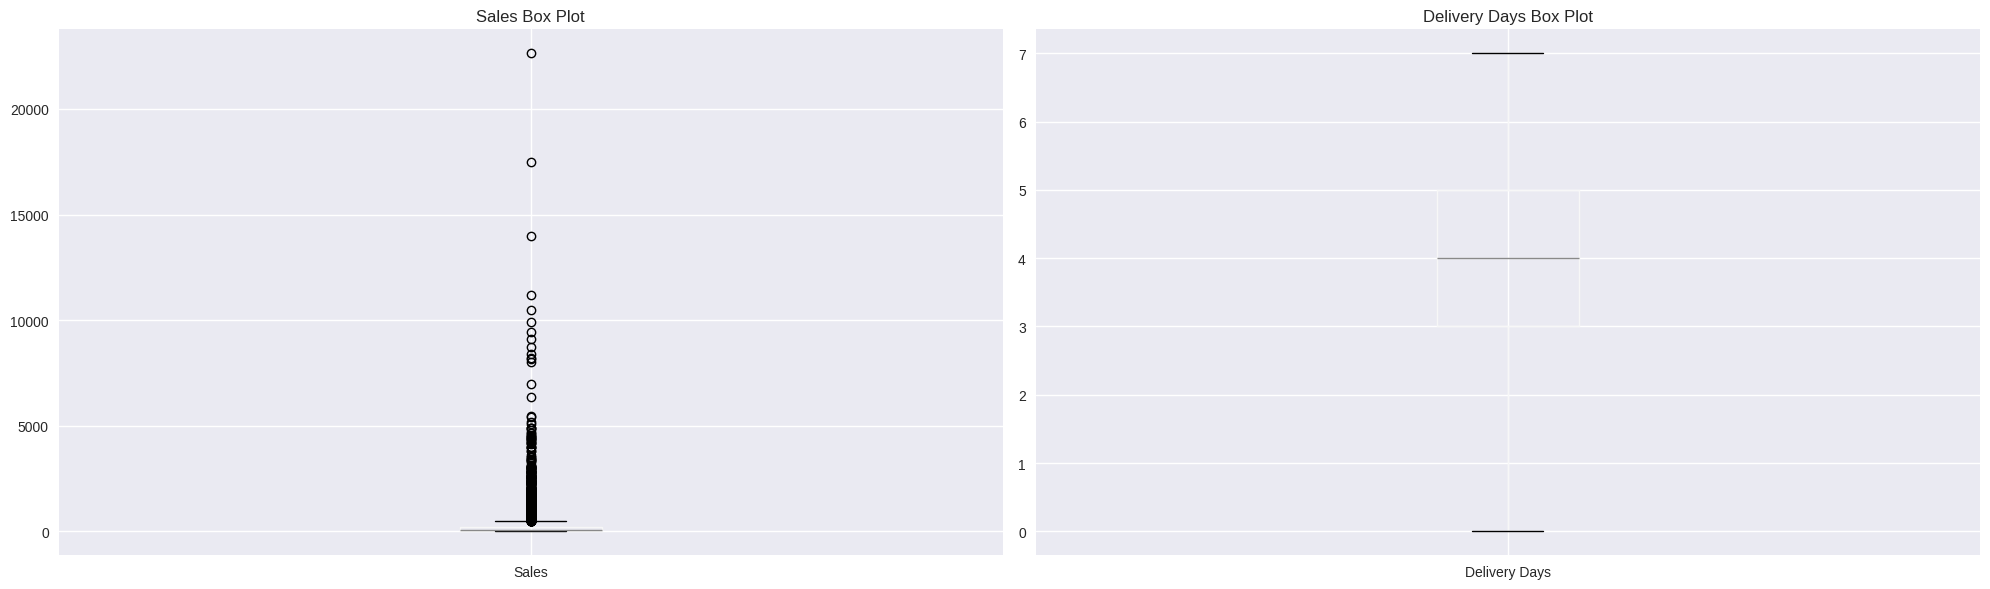

In [14]:
# Box plots for outlier detection
print("📦 OUTLIER ANALYSIS:")
print("=" * 20)

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 6))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    if col in df.columns:
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'{col} Box Plot')

        # Calculate and display outlier statistics
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        print(f"\n{col}:")
        print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
        print(f"  Range: [{lower_bound:.2f}, {upper_bound:.2f}]")

plt.tight_layout()
plt.show()

## 4. Bivariate and Multivariate Analysis

🔗 CORRELATION ANALYSIS:
Correlation Matrix:


,Sales,Delivery Days
Sales,1.000000,-0.005712
Delivery Days,-0.005712,1.000000


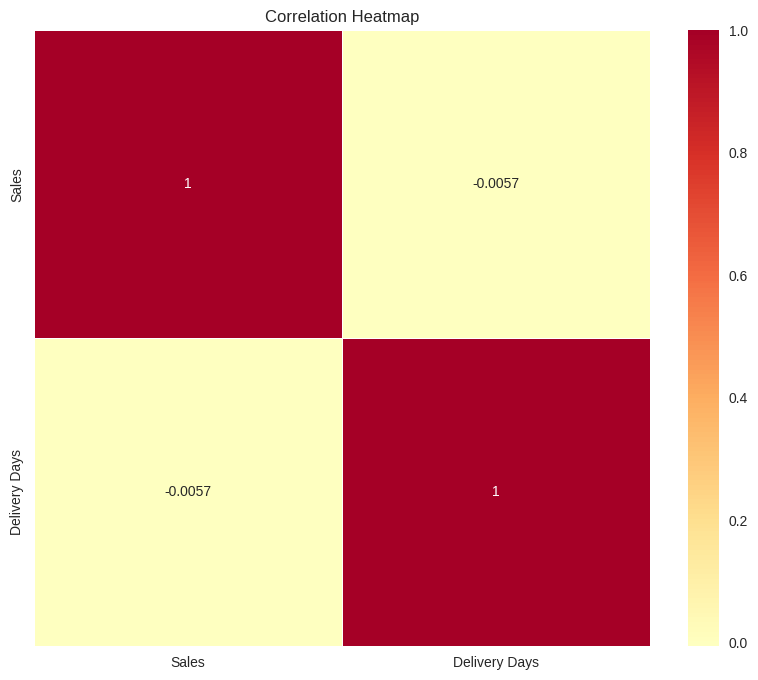


Strong Correlations (|r| > 0.5):


In [15]:
# Correlation analysis
print("🔗 CORRELATION ANALYSIS:")
print("=" * 25)

# Select numerical columns for correlation
corr_cols = [col for col in numerical_cols if col in df.columns]
if len(corr_cols) > 1:
    correlation_matrix = df[corr_cols].corr()

    # Display correlation matrix
    print("Correlation Matrix:")
    display(correlation_matrix)

    # Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
                square=True, linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

    # Strong correlations
    print("\nStrong Correlations (|r| > 0.5):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                strong_corr.append((correlation_matrix.columns[i],
                                 correlation_matrix.columns[j],
                                 corr_val))

    for col1, col2, corr in strong_corr:
        print(f"  {col1} vs {col2}: {corr:.3f}")

💰 SALES ANALYSIS BY DIMENSIONS:


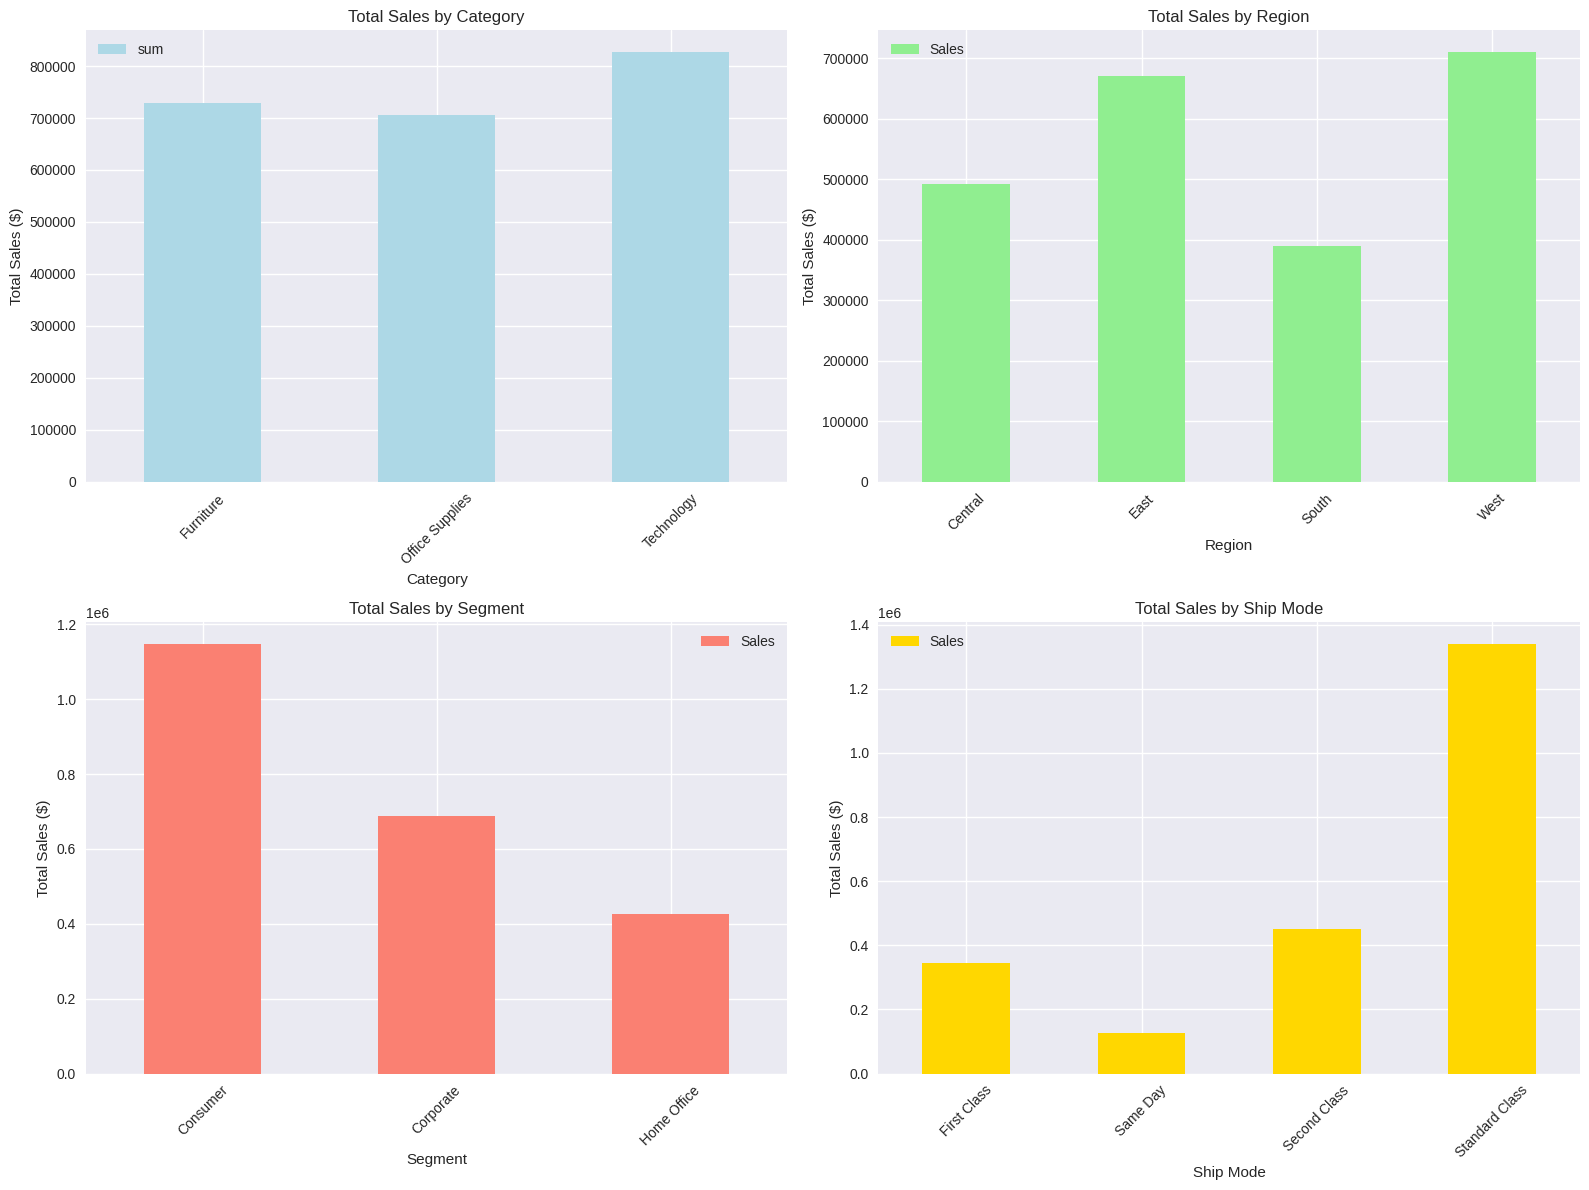


Sales Summary by Category:


,Category,sum,mean,count
0,Furniture,728658.5757,350.653790,2078
1,Office Supplies,705422.3340,119.381001,5909
2,Technology,827455.8730,456.401474,1813


In [16]:
# Sales analysis by different dimensions
print("💰 SALES ANALYSIS BY DIMENSIONS:")
print("=" * 35)

# Sales by Category
if 'Category' in df.columns and 'Sales' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Sales by Category
    category_sales = df.groupby('Category')['Sales'].agg(['sum', 'mean', 'count']).reset_index()
    category_sales.plot(x='Category', y='sum', kind='bar', ax=axes[0,0], color='lightblue')
    axes[0,0].set_title('Total Sales by Category')
    axes[0,0].set_ylabel('Total Sales ($)')
    axes[0,0].tick_params(axis='x', rotation=45)

    # Sales by Region
    if 'Region' in df.columns:
        region_sales = df.groupby('Region')['Sales'].sum().reset_index()
        region_sales.plot(x='Region', y='Sales', kind='bar', ax=axes[0,1], color='lightgreen')
        axes[0,1].set_title('Total Sales by Region')
        axes[0,1].set_ylabel('Total Sales ($)')
        axes[0,1].tick_params(axis='x', rotation=45)

    # Sales by Segment
    if 'Segment' in df.columns:
        segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
        segment_sales.plot(x='Segment', y='Sales', kind='bar', ax=axes[1,0], color='salmon')
        axes[1,0].set_title('Total Sales by Segment')
        axes[1,0].set_ylabel('Total Sales ($)')
        axes[1,0].tick_params(axis='x', rotation=45)

    # Sales by Ship Mode
    if 'Ship Mode' in df.columns:
        shipmode_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()
        shipmode_sales.plot(x='Ship Mode', y='Sales', kind='bar', ax=axes[1,1], color='gold')
        axes[1,1].set_title('Total Sales by Ship Mode')
        axes[1,1].set_ylabel('Total Sales ($)')
        axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nSales Summary by Category:")
    display(category_sales)

📊 CROSS-TABULATION ANALYSIS:
Sales by Category and Region:


Region,Central,East,South,West
Category,,,,
Furniture,160317.4622,206461.388,116531.480,245348.2455
Office Supplies,163590.2430,199940.811,124424.771,217466.5090
Technology,168739.2080,263116.527,148195.208,247404.9300


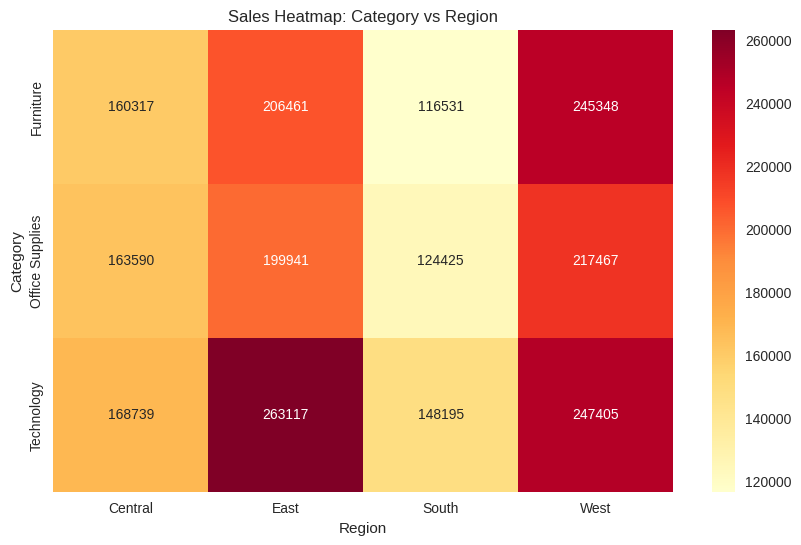


Sales by Segment and Category:


Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,387696.2580,359352.608,401011.665
Corporate,220321.7018,224130.536,244041.837
Home Office,120640.6159,121939.190,182402.371


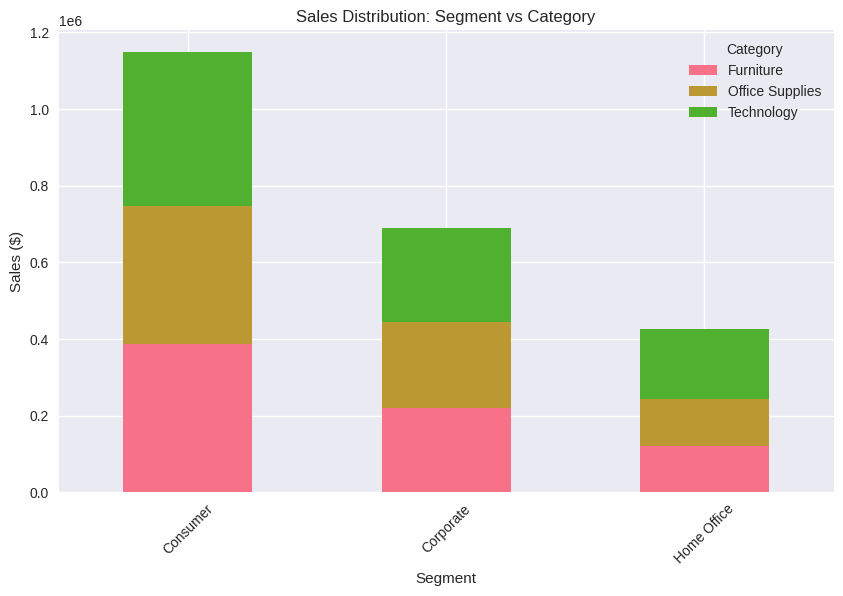

In [17]:
# Cross-tabulation analysis
print("📊 CROSS-TABULATION ANALYSIS:")
print("=" * 30)

if 'Category' in df.columns and 'Region' in df.columns:
    # Category vs Region crosstab
    crosstab_cat_region = pd.crosstab(df['Category'], df['Region'], values=df['Sales'], aggfunc='sum')

    print("Sales by Category and Region:")
    display(crosstab_cat_region)

    # Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab_cat_region, annot=True, fmt='.0f', cmap='YlOrRd')
    plt.title('Sales Heatmap: Category vs Region')
    plt.show()

if 'Segment' in df.columns and 'Category' in df.columns:
    # Segment vs Category crosstab
    crosstab_seg_cat = pd.crosstab(df['Segment'], df['Category'], values=df['Sales'], aggfunc='sum')

    print("\nSales by Segment and Category:")
    display(crosstab_seg_cat)

    # Stacked bar chart
    crosstab_seg_cat.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Sales Distribution: Segment vs Category')
    plt.xlabel('Segment')
    plt.ylabel('Sales ($)')
    plt.legend(title='Category')
    plt.xticks(rotation=45)
    plt.show()

## 5. Time Series Analysis

📈 TIME SERIES ANALYSIS:


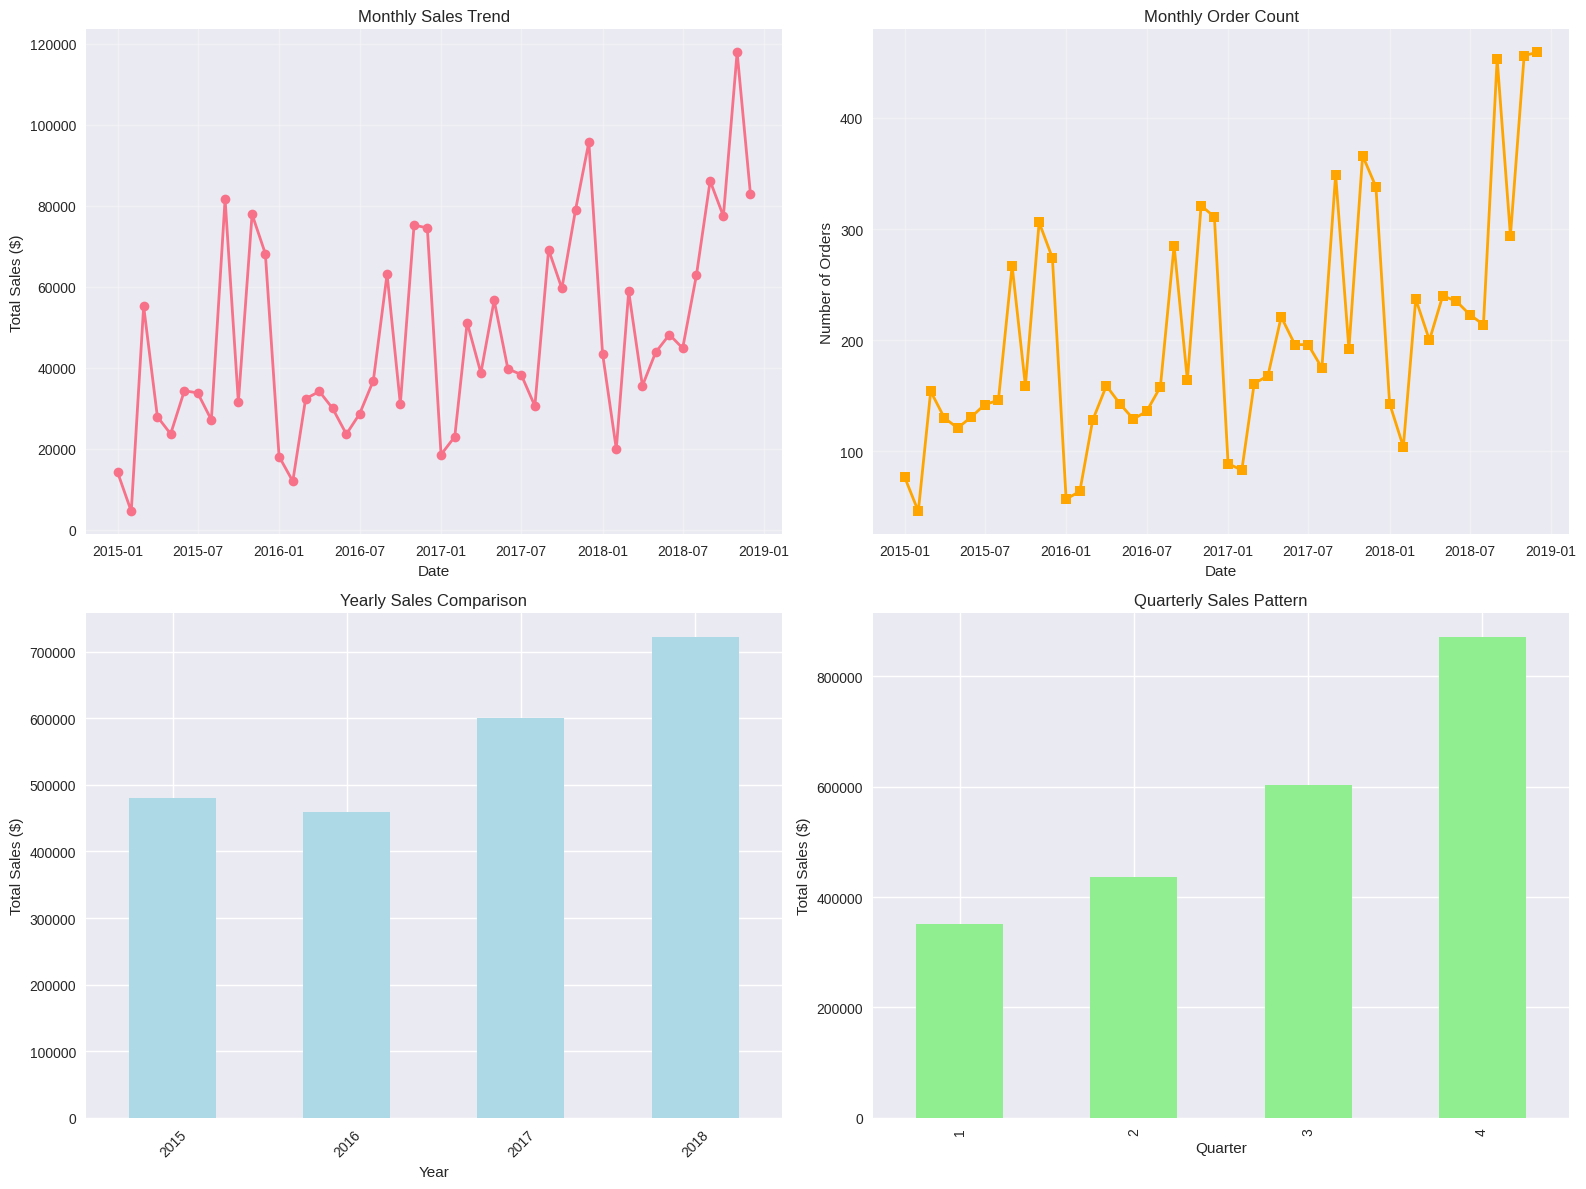


Seasonal Analysis - Sales by Quarter:


,sum,mean,count
Order Quarter,,,
1,351236.3322,261.531148,1343
2,436207.2476,210.423178,2073
3,602955.0277,219.735797,2744
4,871138.1752,239.323675,3640


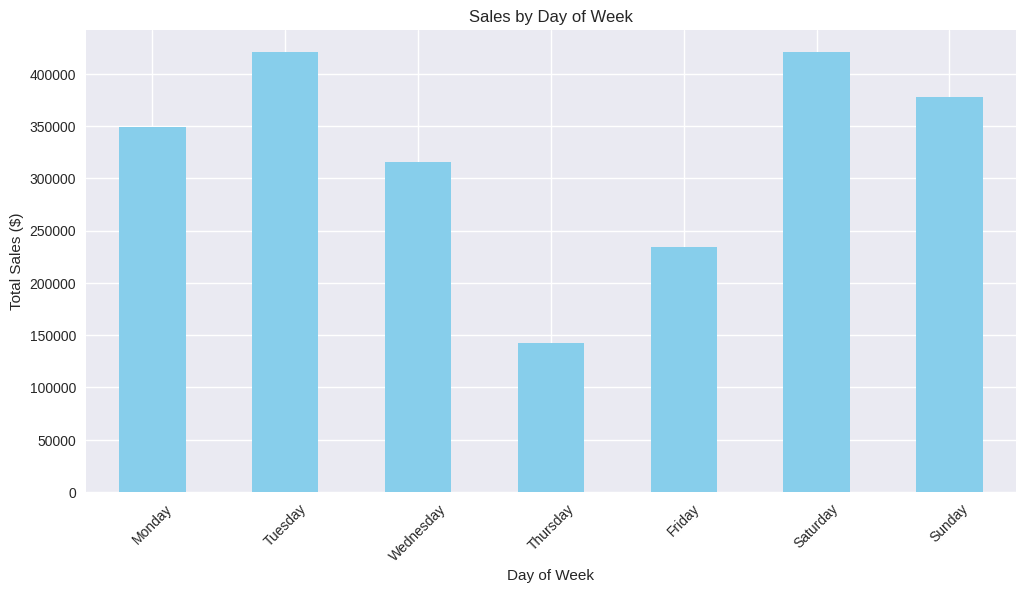

In [18]:
# Time series analysis
print("📈 TIME SERIES ANALYSIS:")
print("=" * 25)

if 'Order Date' in df.columns and 'Sales' in df.columns:
    # Monthly sales trend
    monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].agg(['sum', 'count']).reset_index()
    monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Monthly sales trend
    axes[0,0].plot(monthly_sales['Order Date'], monthly_sales['sum'], marker='o', linewidth=2)
    axes[0,0].set_title('Monthly Sales Trend')
    axes[0,0].set_xlabel('Date')
    axes[0,0].set_ylabel('Total Sales ($)')
    axes[0,0].grid(True, alpha=0.3)

    # Monthly order count
    axes[0,1].plot(monthly_sales['Order Date'], monthly_sales['count'], marker='s', color='orange', linewidth=2)
    axes[0,1].set_title('Monthly Order Count')
    axes[0,1].set_xlabel('Date')
    axes[0,1].set_ylabel('Number of Orders')
    axes[0,1].grid(True, alpha=0.3)

    # Yearly sales comparison
    if 'Order Year' in df.columns:
        yearly_sales = df.groupby('Order Year')['Sales'].sum()
        yearly_sales.plot(kind='bar', ax=axes[1,0], color='lightblue')
        axes[1,0].set_title('Yearly Sales Comparison')
        axes[1,0].set_xlabel('Year')
        axes[1,0].set_ylabel('Total Sales ($)')
        axes[1,0].tick_params(axis='x', rotation=45)

    # Quarterly sales pattern
    if 'Order Quarter' in df.columns:
        quarterly_sales = df.groupby('Order Quarter')['Sales'].sum()
        quarterly_sales.plot(kind='bar', ax=axes[1,1], color='lightgreen')
        axes[1,1].set_title('Quarterly Sales Pattern')
        axes[1,1].set_xlabel('Quarter')
        axes[1,1].set_ylabel('Total Sales ($)')

    plt.tight_layout()
    plt.show()

    # Seasonal analysis
    print("\nSeasonal Analysis - Sales by Quarter:")
    if 'Order Quarter' in df.columns:
        quarterly_stats = df.groupby('Order Quarter')['Sales'].agg(['sum', 'mean', 'count'])
        display(quarterly_stats)

    # Day of week analysis
    if 'Order Day of Week' in df.columns:
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        dow_sales = df.groupby('Order Day of Week')['Sales'].sum().reindex(day_order)

        plt.figure(figsize=(12, 6))
        dow_sales.plot(kind='bar', color='skyblue')
        plt.title('Sales by Day of Week')
        plt.xlabel('Day of Week')
        plt.ylabel('Total Sales ($)')
        plt.xticks(rotation=45)
        plt.show()

🚚 DELIVERY TIME ANALYSIS:
Delivery Days Statistics:


,Delivery Days
count,9800.000000
mean,3.961122
std,1.749614
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000



Delivery Time by Ship Mode:


,mean,median,std
Ship Mode,,,
First Class,2.179214,2.0,0.774076
Same Day,0.044610,0.0,0.206637
Second Class,3.249211,3.0,1.188201
Standard Class,5.008363,5.0,1.010578


<Figure size 1200x600 with 0 Axes>

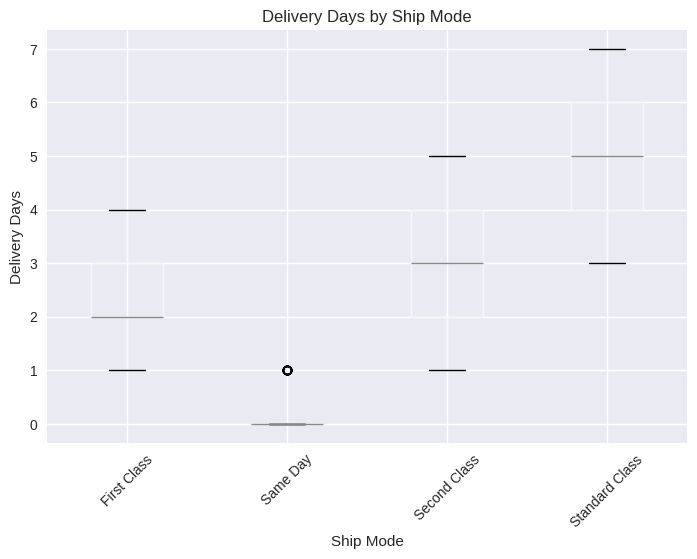

In [19]:
# Delivery time analysis
print("🚚 DELIVERY TIME ANALYSIS:")
print("=" * 25)

if 'Delivery Days' in df.columns:
    # Delivery statistics
    delivery_stats = df['Delivery Days'].describe()
    print("Delivery Days Statistics:")
    display(delivery_stats)

    # Delivery time by ship mode
    if 'Ship Mode' in df.columns:
        delivery_by_mode = df.groupby('Ship Mode')['Delivery Days'].agg(['mean', 'median', 'std'])
        print("\nDelivery Time by Ship Mode:")
        display(delivery_by_mode)

        # Box plot
        plt.figure(figsize=(12, 6))
        df.boxplot(column='Delivery Days', by='Ship Mode')
        plt.title('Delivery Days by Ship Mode')
        plt.suptitle('')  # Remove default title
        plt.xlabel('Ship Mode')
        plt.ylabel('Delivery Days')
        plt.xticks(rotation=45)
        plt.show()

## 6. Geographic Analysis

🗺️ GEOGRAPHIC ANALYSIS:
Top 10 States by Sales:


,Total Sales,Avg Sales,Orders,Customers
State,,,,
California,446306.46,229.35,1946,570
New York,306361.15,279.27,1097,409
Texas,168572.53,173.25,973,367
Washington,135206.85,268.27,504,223
Pennsylvania,116276.65,199.79,582,255
Florida,88436.53,237.10,373,178
Illinois,79236.52,164.05,483,231
Michigan,76136.07,300.93,253,105
Ohio,75130.35,165.49,454,196


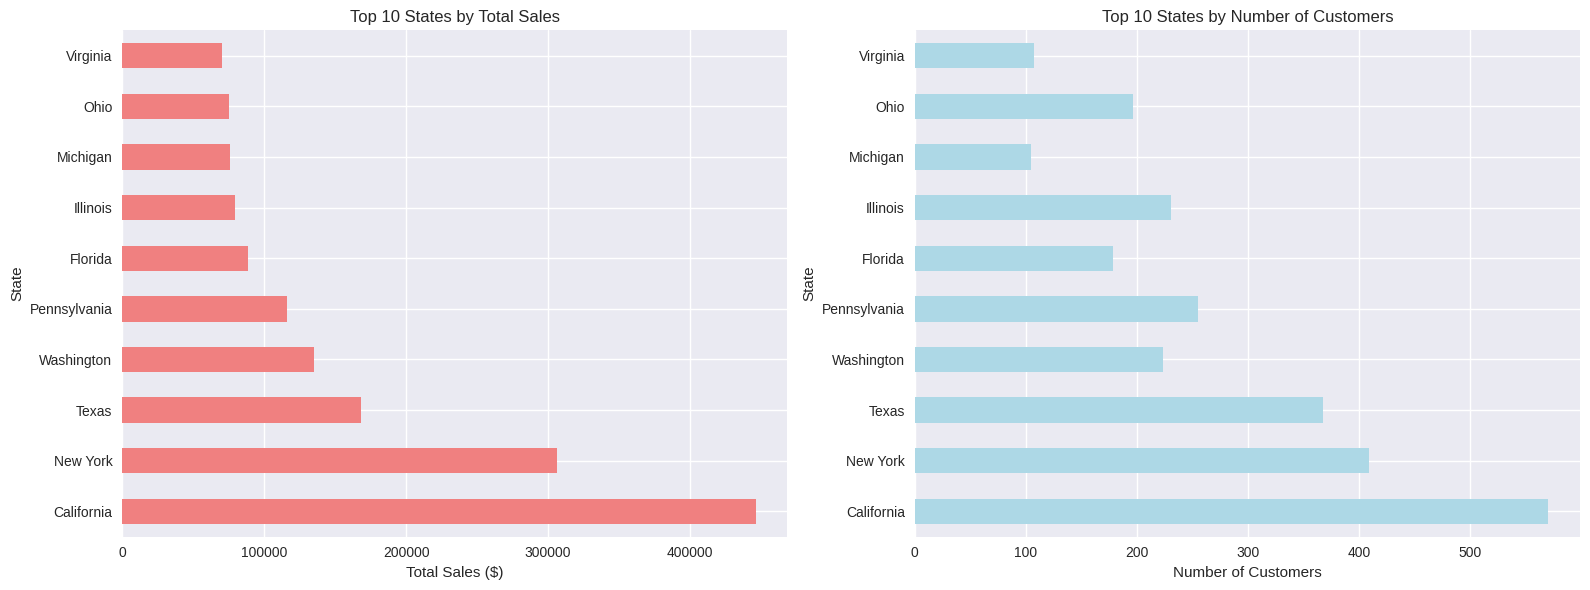


Top 15 Cities by Sales:


,Total Sales,Orders
City,,
New York City,252462.55,439
Los Angeles,173420.18,378
Seattle,116106.32,210
San Francisco,109041.12,261
Philadelphia,108841.75,262
Houston,63956.14,186
Chicago,47820.13,166
San Diego,47521.03,88
Jacksonville,44713.18,61


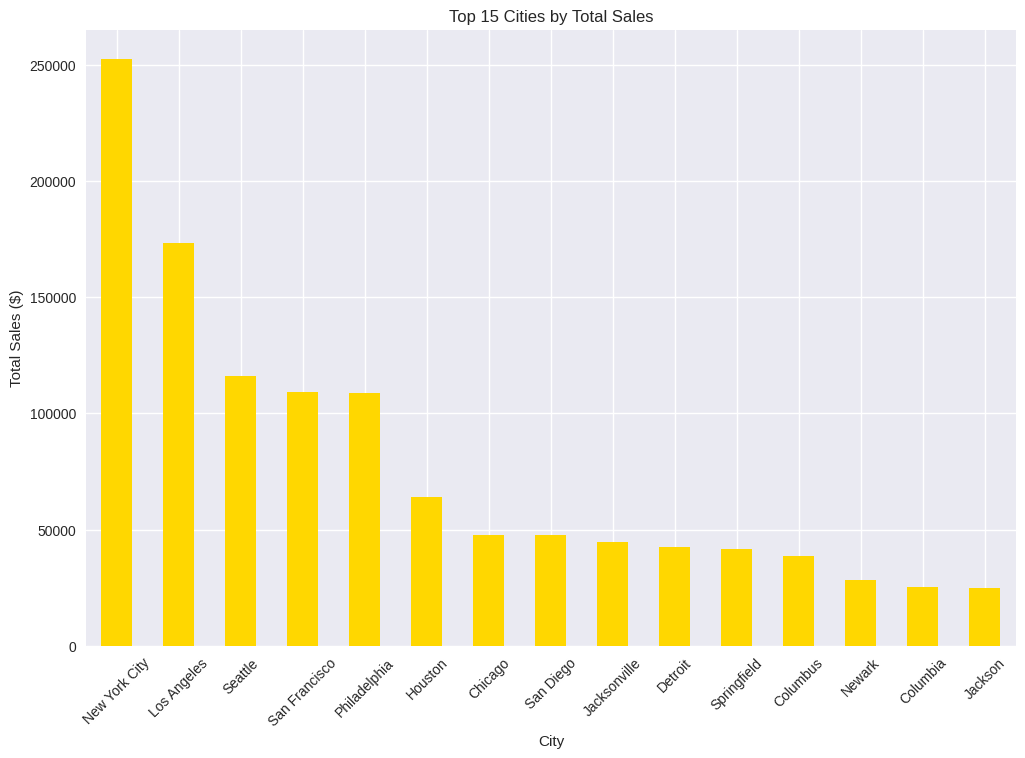


📊 Regional Performance Summary:


,Total Sales,Avg Sales,Orders,Customers,Avg Delivery Days
Region,,,,,
Central,492646.91,216.36,1156,626,4.07
East,669518.73,240.40,1369,669,3.91
South,389151.46,243.52,810,509,3.96
West,710219.68,226.18,1587,681,3.93


In [20]:
# Geographic analysis
print("🗺️ GEOGRAPHIC ANALYSIS:")
print("=" * 25)

# Sales by State
if 'State' in df.columns and 'Sales' in df.columns:
    state_analysis = df.groupby('State').agg({
        'Sales': ['sum', 'mean', 'count'],
        'Customer ID': 'nunique'
    }).round(2)

    state_analysis.columns = ['Total Sales', 'Avg Sales', 'Orders', 'Customers']
    state_analysis = state_analysis.sort_values('Total Sales', ascending=False)

    print("Top 10 States by Sales:")
    display(state_analysis.head(10))

    # Top states visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Top 10 states by sales
    state_analysis.head(10)['Total Sales'].plot(kind='barh', ax=axes[0], color='lightcoral')
    axes[0].set_title('Top 10 States by Total Sales')
    axes[0].set_xlabel('Total Sales ($)')

    # Top 10 states by number of customers
    state_analysis.head(10)['Customers'].plot(kind='barh', ax=axes[1], color='lightblue')
    axes[1].set_title('Top 10 States by Number of Customers')
    axes[1].set_xlabel('Number of Customers')

    plt.tight_layout()
    plt.show()

# Sales by City
if 'City' in df.columns:
    city_analysis = df.groupby('City').agg({
        'Sales': 'sum',
        'Order ID': 'nunique'
    }).round(2)

    city_analysis.columns = ['Total Sales', 'Orders']
    city_analysis = city_analysis.sort_values('Total Sales', ascending=False)

    print("\nTop 15 Cities by Sales:")
    display(city_analysis.head(15))

    # Top cities visualization
    plt.figure(figsize=(12, 8))
    city_analysis.head(15)['Total Sales'].plot(kind='bar', color='gold')
    plt.title('Top 15 Cities by Total Sales')
    plt.xlabel('City')
    plt.ylabel('Total Sales ($)')
    plt.xticks(rotation=45)
    plt.show()

# Regional performance comparison
if 'Region' in df.columns:
    regional_analysis = df.groupby('Region').agg({
        'Sales': ['sum', 'mean'],
        'Order ID': 'nunique',
        'Customer ID': 'nunique',
        'Delivery Days': 'mean'
    }).round(2)

    regional_analysis.columns = ['Total Sales', 'Avg Sales', 'Orders', 'Customers', 'Avg Delivery Days']

    print("\n📊 Regional Performance Summary:")
    display(regional_analysis)

## 7. Customer Segmentation Analysis

👥 CUSTOMER SEGMENTATION ANALYSIS:
Customer Segments Distribution:


,count
Segment,
Regular,448
High Value,159
Recent,93
Frequent,93


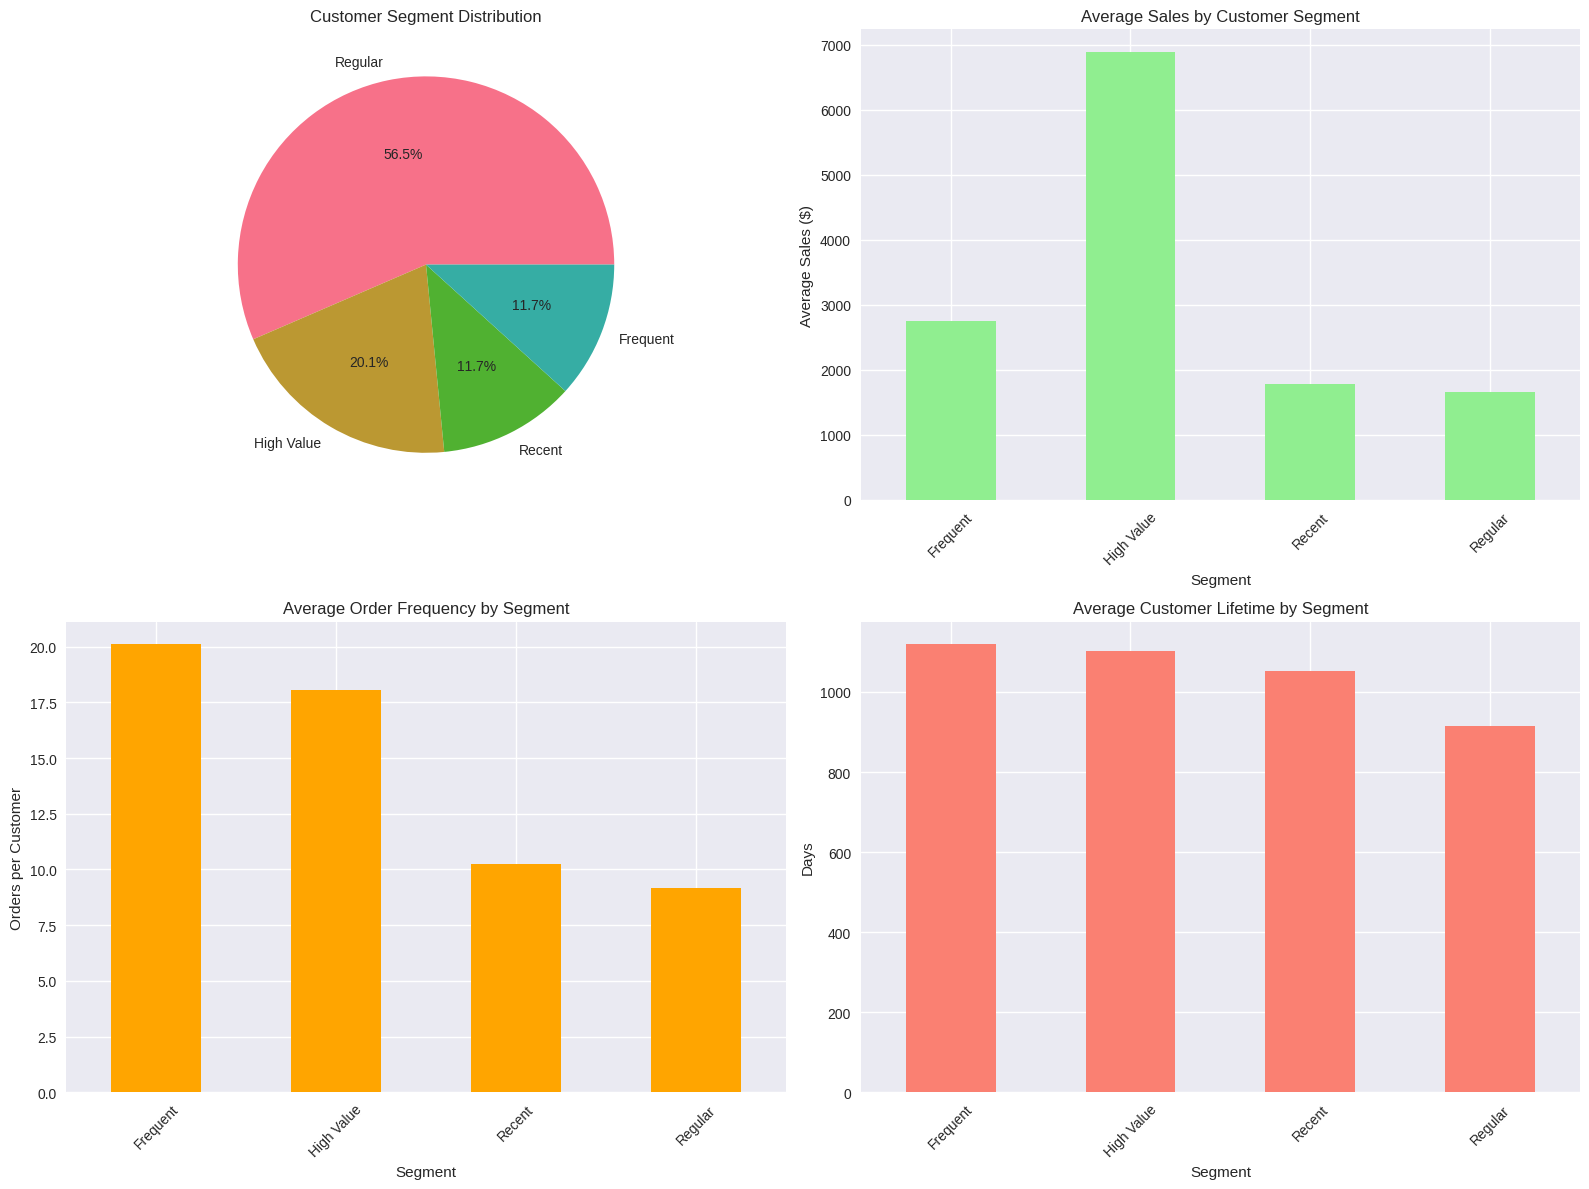


🏆 Top 10 Customers by Total Sales:


,Customer ID,Total Sales,Order Frequency,Avg Order Value,Segment
700,SM-20320,25043.05,15,1669.54,High Value
741,TC-20980,19052.22,12,1587.68,High Value
621,RB-19360,15117.34,18,839.85,High Value
730,TA-21385,14595.62,10,1459.56,High Value
6,AB-10105,14473.57,20,723.68,High Value
434,KL-16645,14175.23,29,488.80,High Value
669,SC-20095,14142.33,22,642.83,High Value
327,HL-15040,12873.30,11,1170.30,High Value
683,SE-20110,12209.44,19,642.60,High Value
131,CC-12370,12129.07,11,1102.64,High Value



📊 Business Segment Performance:


,Total Sales,Avg Sales,Orders,Customers
Segment,,,,
Consumer,1148060.53,225.07,2537,409
Corporate,688494.07,233.15,1491,236
Home Office,424982.18,243.40,894,148


In [21]:
# Customer analysis
print("👥 CUSTOMER SEGMENTATION ANALYSIS:")
print("=" * 35)

if 'Customer ID' in df.columns and 'Sales' in df.columns:
    # Customer-level analysis
    customer_analysis = df.groupby('Customer ID').agg({
        'Sales': ['sum', 'mean', 'count'],
        'Order Date': ['min', 'max'],
        'Category': lambda x: x.nunique()
    }).round(2)

    customer_analysis.columns = ['Total Sales', 'Avg Order Value', 'Order Frequency',
                                'First Order', 'Last Order', 'Categories Purchased']

    # Calculate customer lifetime (days)
    customer_analysis['Customer Lifetime (Days)'] = (
        customer_analysis['Last Order'] - customer_analysis['First Order']
    ).dt.days

    # Customer segmentation based on RFM-like analysis
    # Recency: Days since last order
    max_date = df['Order Date'].max()
    customer_recency = df.groupby('Customer ID')['Order Date'].max().reset_index()
    customer_recency['Recency'] = (max_date - customer_recency['Order Date']).dt.days

    # Merge with customer analysis
    customer_analysis = customer_analysis.reset_index().merge(
        customer_recency[['Customer ID', 'Recency']], on='Customer ID'
    )

    # Define customer segments
    def categorize_customers(row):
        if row['Total Sales'] >= customer_analysis['Total Sales'].quantile(0.8):
            return 'High Value'
        elif row['Order Frequency'] >= customer_analysis['Order Frequency'].quantile(0.8):
            return 'Frequent'
        elif row['Recency'] <= customer_analysis['Recency'].quantile(0.2):
            return 'Recent'
        else:
            return 'Regular'

    customer_analysis['Segment'] = customer_analysis.apply(categorize_customers, axis=1)

    print("Customer Segments Distribution:")
    segment_dist = customer_analysis['Segment'].value_counts()
    display(segment_dist)

    # Visualize customer segments
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Segment distribution
    segment_dist.plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%')
    axes[0,0].set_title('Customer Segment Distribution')
    axes[0,0].set_ylabel('')

    # Average sales by segment
    segment_sales = customer_analysis.groupby('Segment')['Total Sales'].mean()
    segment_sales.plot(kind='bar', ax=axes[0,1], color='lightgreen')
    axes[0,1].set_title('Average Sales by Customer Segment')
    axes[0,1].set_ylabel('Average Sales ($)')
    axes[0,1].tick_params(axis='x', rotation=45)

    # Order frequency by segment
    segment_freq = customer_analysis.groupby('Segment')['Order Frequency'].mean()
    segment_freq.plot(kind='bar', ax=axes[1,0], color='orange')
    axes[1,0].set_title('Average Order Frequency by Segment')
    axes[1,0].set_ylabel('Orders per Customer')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Customer lifetime by segment
    segment_lifetime = customer_analysis.groupby('Segment')['Customer Lifetime (Days)'].mean()
    segment_lifetime.plot(kind='bar', ax=axes[1,1], color='salmon')
    axes[1,1].set_title('Average Customer Lifetime by Segment')
    axes[1,1].set_ylabel('Days')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Top customers
    print("\n🏆 Top 10 Customers by Total Sales:")
    top_customers = customer_analysis.nlargest(10, 'Total Sales')[[
        'Customer ID', 'Total Sales', 'Order Frequency', 'Avg Order Value', 'Segment'
    ]]
    display(top_customers)

# Segment-wise performance
if 'Segment' in df.columns:
    segment_performance = df.groupby('Segment').agg({
        'Sales': ['sum', 'mean'],
        'Order ID': 'nunique',
        'Customer ID': 'nunique'
    }).round(2)

    segment_performance.columns = ['Total Sales', 'Avg Sales', 'Orders', 'Customers']

    print("\n📊 Business Segment Performance:")
    display(segment_performance)

## 8. Product Performance Analysis

🛍️ PRODUCT PERFORMANCE ANALYSIS:
📊 Category Performance Summary:


,Total Sales,Avg Sales,Orders,Customers,Sub-Categories
Category,,,,,
Technology,827455.87,456.40,1813,684,4
Furniture,728658.58,350.65,2078,705,4
Office Supplies,705422.33,119.38,5909,787,9



🏆 Top 15 Sub-Categories by Sales:


Total Sales  Avg Sales  Orders
Category        Sub-Category                                
Technology      Phones          327782.45     374.18     876
Furniture       Chairs          322822.73     531.83     607
Office Supplies Storage         219343.39     263.63     832
Furniture       Tables          202810.63     645.89     314
Office Supplies Binders         200028.78     134.07    1492
Technology      Machines        189238.63    1645.55     115
                Accessories     164186.70     217.18     756
                Copiers         146248.09    2215.88      66
Furniture       Bookcases       113813.20     503.60     226
Office Supplies Appliances      104618.40     227.93     459
Furniture       Furnishings      89212.02      95.82     931
Office Supplies Paper            76828.30      57.42    1338
                Supplies         46420.31     252.28     184
                Art              26705.41      34.02     785
                Envelopes        16128.05      65.03     248

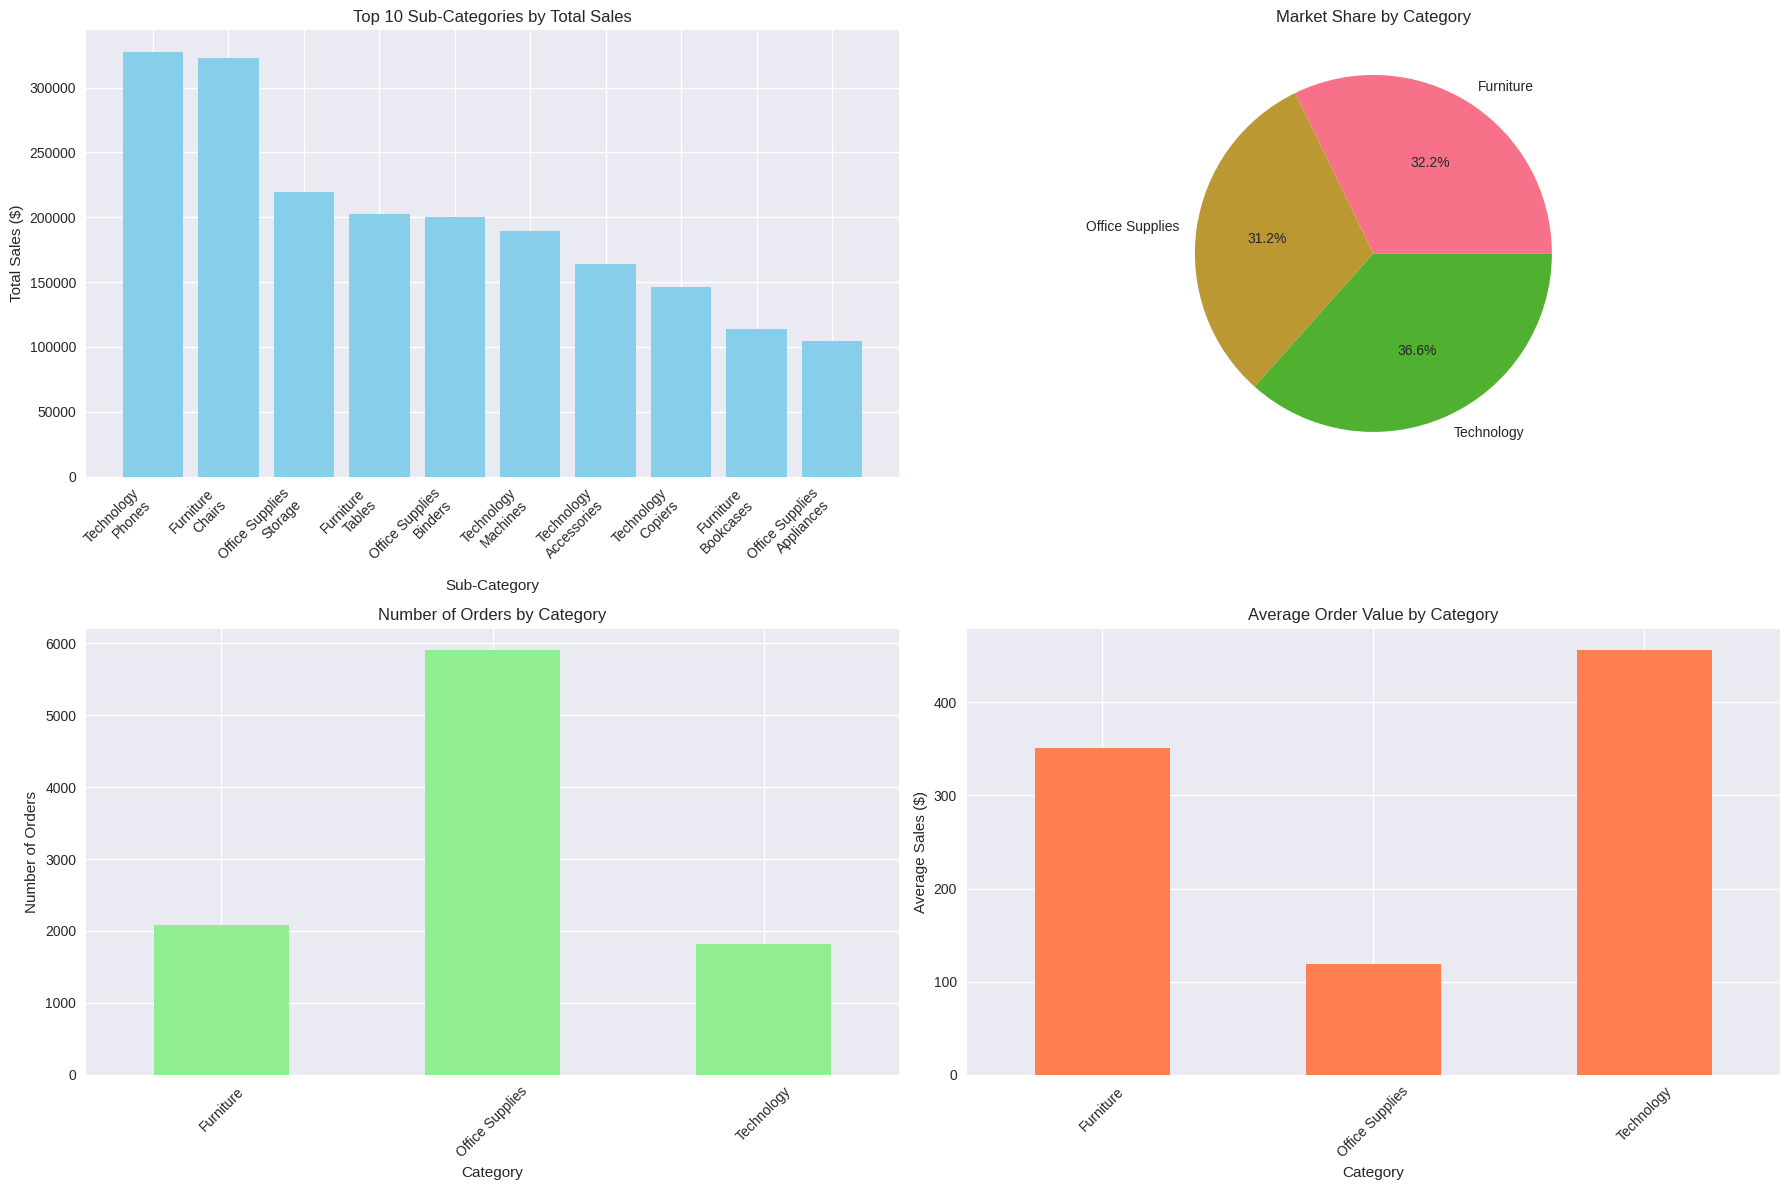


🌟 Top 10 Products by Sales:


,Total Sales,Orders,Customers
Product Name,,,
Canon imageCLASS 2200 Advanced Copier,61599.82,5,5
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.38,10,10
Cisco TelePresence System EX90 Videoconferencing Unit,22638.48,1,1
HON 5400 Series Task Chairs for Big and Tall,21870.58,8,8
GBC DocuBind TL300 Electric Binding System,19823.48,11,11
GBC Ibimaster 500 Manual ProClick Binding System,19024.50,9,9
Hewlett Packard LaserJet 3310 Copier,18839.69,8,8
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.90,3,3
GBC DocuBind P400 Electric Binding System,17965.07,6,6



📈 Top 10 Most Ordered Products:


,Total Sales,Orders,Customers
Product Name,,,
Staple envelope,1675.65,47,44
Staples,755.47,46,43
Easy-staple paper,2414.16,44,44
Avery Non-Stick Binders,217.32,20,20
Staples in misc. colors,459.66,18,18
Staple remover,263.09,18,18
KI Adjustable-Height Table,4466.66,17,17
Storex Dura Pro Binders,278.59,17,17
Staple-based wall hangings,422.29,16,15


In [22]:
# Product performance analysis
print("🛍️ PRODUCT PERFORMANCE ANALYSIS:")
print("=" * 35)

# Category performance
if 'Category' in df.columns and 'Sales' in df.columns:
    category_performance = df.groupby('Category').agg({
        'Sales': ['sum', 'mean', 'count'],
        'Customer ID': 'nunique',
        'Sub-Category': 'nunique'
    }).round(2)

    category_performance.columns = ['Total Sales', 'Avg Sales', 'Orders', 'Customers', 'Sub-Categories']
    category_performance = category_performance.sort_values('Total Sales', ascending=False)

    print("📊 Category Performance Summary:")
    display(category_performance)

# Sub-category analysis
if 'Sub-Category' in df.columns:
    subcategory_performance = df.groupby(['Category', 'Sub-Category']).agg({
        'Sales': ['sum', 'mean', 'count']
    }).round(2)

    subcategory_performance.columns = ['Total Sales', 'Avg Sales', 'Orders']
    subcategory_performance = subcategory_performance.sort_values('Total Sales', ascending=False)

    print("\n🏆 Top 15 Sub-Categories by Sales:")
    display(subcategory_performance.head(15))

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    # Top sub-categories by sales
    top_subcats = subcategory_performance.head(10)
    subcats_names = [f"{idx[0]}\n{idx[1]}" for idx in top_subcats.index]

    axes[0,0].bar(range(len(top_subcats)), top_subcats['Total Sales'], color='skyblue')
    axes[0,0].set_title('Top 10 Sub-Categories by Total Sales')
    axes[0,0].set_xlabel('Sub-Category')
    axes[0,0].set_ylabel('Total Sales ($)')
    axes[0,0].set_xticks(range(len(top_subcats)))
    axes[0,0].set_xticklabels(subcats_names, rotation=45, ha='right')

    # Category market share
    category_sales = df.groupby('Category')['Sales'].sum()
    axes[0,1].pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%')
    axes[0,1].set_title('Market Share by Category')

    # Orders by category
    category_orders = df.groupby('Category').size()
    category_orders.plot(kind='bar', ax=axes[1,0], color='lightgreen')
    axes[1,0].set_title('Number of Orders by Category')
    axes[1,0].set_ylabel('Number of Orders')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Average order value by category
    avg_order_value = df.groupby('Category')['Sales'].mean()
    avg_order_value.plot(kind='bar', ax=axes[1,1], color='coral')
    axes[1,1].set_title('Average Order Value by Category')
    axes[1,1].set_ylabel('Average Sales ($)')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Product name analysis (if available)
if 'Product Name' in df.columns:
    product_performance = df.groupby('Product Name').agg({
        'Sales': ['sum', 'count'],
        'Customer ID': 'nunique'
    }).round(2)

    product_performance.columns = ['Total Sales', 'Orders', 'Customers']
    product_performance = product_performance.sort_values('Total Sales', ascending=False)

    print("\n🌟 Top 10 Products by Sales:")
    display(product_performance.head(10))

    # Most popular products (by order count)
    print("\n📈 Top 10 Most Ordered Products:")
    most_ordered = product_performance.sort_values('Orders', ascending=False).head(10)
    display(most_ordered)

## 9. Key Business Insights

In [23]:
# Business insights generation
print("💡 KEY BUSINESS INSIGHTS:")
print("=" * 30)

insights = []

# Sales insights
if 'Sales' in df.columns:
    total_sales = df['Sales'].sum()
    avg_order_value = df['Sales'].mean()
    insights.append(f"💰 Total Revenue: ${total_sales:,.2f}")
    insights.append(f"📊 Average Order Value: ${avg_order_value:.2f}")

# Customer insights
if 'Customer ID' in df.columns:
    unique_customers = df['Customer ID'].nunique()
    insights.append(f"👥 Total Unique Customers: {unique_customers:,}")

    if 'Order ID' in df.columns:
        unique_orders = df['Order ID'].nunique()
        orders_per_customer = unique_orders / unique_customers
        insights.append(f"🔄 Orders per Customer: {orders_per_customer:.2f}")

# Category insights
if 'Category' in df.columns and 'Sales' in df.columns:
    top_category = df.groupby('Category')['Sales'].sum().idxmax()
    top_category_sales = df.groupby('Category')['Sales'].sum().max()
    insights.append(f"🏆 Top Category: {top_category} (${top_category_sales:,.2f})")

# Regional insights
if 'Region' in df.columns and 'Sales' in df.columns:
    top_region = df.groupby('Region')['Sales'].sum().idxmax()
    top_region_sales = df.groupby('Region')['Sales'].sum().max()
    insights.append(f"🌍 Top Region: {top_region} (${top_region_sales:,.2f})")

# Segment insights
if 'Segment' in df.columns and 'Sales' in df.columns:
    top_segment = df.groupby('Segment')['Sales'].sum().idxmax()
    top_segment_sales = df.groupby('Segment')['Sales'].sum().max()
    insights.append(f"🎯 Top Segment: {top_segment} (${top_segment_sales:,.2f})")

# Time insights
if 'Order Year' in df.columns and 'Sales' in df.columns:
    yearly_growth = df.groupby('Order Year')['Sales'].sum().pct_change().dropna()
    if not yearly_growth.empty:
        avg_growth = yearly_growth.mean() * 100
        insights.append(f"📈 Average YoY Growth: {avg_growth:.1f}%")

# Delivery insights
if 'Delivery Days' in df.columns:
    avg_delivery = df['Delivery Days'].mean()
    insights.append(f"🚚 Average Delivery Time: {avg_delivery:.1f} days")

# Print insights
for i, insight in enumerate(insights, 1):
    print(f"{i:2d}. {insight}")

print("\n" + "="*50)
print("🔍 DETAILED ANALYSIS SUMMARY:")
print("="*50)

💡 KEY BUSINESS INSIGHTS:
 1. 💰 Total Revenue: $2,261,536.78
 2. 📊 Average Order Value: $230.77
 3. 👥 Total Unique Customers: 793
 4. 🔄 Orders per Customer: 6.21
 5. 🏆 Top Category: Technology ($827,455.87)
 6. 🌍 Top Region: West ($710,219.68)
 7. 🎯 Top Segment: Consumer ($1,148,060.53)
 8. 📈 Average YoY Growth: 15.6%
 9. 🚚 Average Delivery Time: 4.0 days

🔍 DETAILED ANALYSIS SUMMARY:


In [24]:
# Performance metrics dashboard
def create_performance_summary():
    summary = {}

    # Sales performance
    if 'Sales' in df.columns:
        summary['Sales Performance'] = {
            'Total Revenue': f"${df['Sales'].sum():,.2f}",
            'Average Order Value': f"${df['Sales'].mean():.2f}",
            'Median Order Value': f"${df['Sales'].median():.2f}",
            'Sales Standard Deviation': f"${df['Sales'].std():.2f}"
        }

    # Customer metrics
    if 'Customer ID' in df.columns:
        summary['Customer Metrics'] = {
            'Total Customers': df['Customer ID'].nunique(),
            'Total Orders': df['Order ID'].nunique() if 'Order ID' in df.columns else len(df),
            'Repeat Customer Rate': f"{(df.groupby('Customer ID').size() > 1).mean() * 100:.1f}%"
        }

    # Geographic coverage
    if 'State' in df.columns:
        summary['Geographic Coverage'] = {
            'States Covered': df['State'].nunique(),
            'Cities Covered': df['City'].nunique() if 'City' in df.columns else 'N/A',
            'Regions Covered': df['Region'].nunique() if 'Region' in df.columns else 'N/A'
        }

    # Product diversity
    if 'Category' in df.columns:
        summary['Product Portfolio'] = {
            'Categories': df['Category'].nunique(),
            'Sub-Categories': df['Sub-Category'].nunique() if 'Sub-Category' in df.columns else 'N/A',
            'Unique Products': df['Product Name'].nunique() if 'Product Name' in df.columns else 'N/A'
        }

    # Operational metrics
    if 'Delivery Days' in df.columns:
        summary['Operational Metrics'] = {
            'Average Delivery Time': f"{df['Delivery Days'].mean():.1f} days",
            'Fastest Delivery': f"{df['Delivery Days'].min()} days",
            'Slowest Delivery': f"{df['Delivery Days'].max()} days"
        }

    return summary

performance_summary = create_performance_summary()

for category, metrics in performance_summary.items():
    print(f"\n📊 {category.upper()}:")
    print("-" * (len(category) + 5))
    for metric, value in metrics.items():
        print(f"  • {metric}: {value}")


📊 SALES PERFORMANCE:
----------------------
  • Total Revenue: $2,261,536.78
  • Average Order Value: $230.77
  • Median Order Value: $54.49
  • Sales Standard Deviation: $626.65

📊 CUSTOMER METRICS:
---------------------
  • Total Customers: 793
  • Total Orders: 4922
  • Repeat Customer Rate: 99.2%

📊 GEOGRAPHIC COVERAGE:
------------------------
  • States Covered: 49
  • Cities Covered: 529
  • Regions Covered: 4

📊 PRODUCT PORTFOLIO:
----------------------
  • Categories: 3
  • Sub-Categories: 17
  • Unique Products: 1849

📊 OPERATIONAL METRICS:
------------------------
  • Average Delivery Time: 4.0 days
  • Fastest Delivery: 0 days
  • Slowest Delivery: 7 days


## 10. Recommendations

In [25]:
# 🎯 STRATEGIC RECOMMENDATIONS
print("🎯 STRATEGIC RECOMMENDATIONS:")
print("=" * 35)

recommendations = []

# Category-based recommendations
if 'Category' in df.columns and 'Sales' in df.columns:
    category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    top_category = category_sales.index[0]
    bottom_category = category_sales.index[-1]

    recommendations.append(f"🚀 **Focus on {top_category}**: This is your top-performing category. Consider expanding the product line and increasing inventory.")
    recommendations.append(f"⚠️  **Improve {bottom_category} Performance**: This category needs attention. Consider marketing campaigns or product improvements.")

# Regional recommendations
if 'Region' in df.columns and 'Sales' in df.columns:
    region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    top_region = region_sales.index[0]
    bottom_region = region_sales.index[-1]

    recommendations.append(f"🌟 **Replicate {top_region} Success**: Analyze what works well in {top_region} and apply those strategies to other regions.")
    recommendations.append(f"📈 **Boost {bottom_region} Sales**: Increase marketing efforts and consider region-specific promotions.")

# Customer segment recommendations
if 'Segment' in df.columns and 'Sales' in df.columns:
    segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
    top_segment = segment_sales.index[0]

    recommendations.append(f"👥 **{top_segment} Segment Strategy**: This is your most valuable segment. Develop targeted retention and upselling strategies.")

# Delivery optimization
if 'Delivery Days' in df.columns and 'Ship Mode' in df.columns:
    delivery_by_mode = df.groupby('Ship Mode')['Delivery Days'].mean().sort_values()
    fastest_mode = delivery_by_mode.index[0]
    slowest_mode = delivery_by_mode.index[-1]

    recommendations.append(f"⚡ **Promote {fastest_mode}**: This shipping method is fastest. Consider incentivizing its use.")
    recommendations.append(f"🐌 **Optimize {slowest_mode}**: This shipping method needs improvement. Work with logistics partners.")

# Seasonal recommendations
if 'Order Quarter' in df.columns and 'Sales' in df.columns:
    quarterly_sales = df.groupby('Order Quarter')['Sales'].sum()
    peak_quarter = quarterly_sales.idxmax()
    low_quarter = quarterly_sales.idxmin()

    recommendations.append(f"📅 **Capitalize on Q{peak_quarter}**: This is the peak sales quarter. Plan inventory and marketing campaigns to maximize sales.")
    recommendations.append(f"📉 **Address Q{low_quarter} Weakness**: Sales are lowest in this quarter. Consider promotions or events to boost sales.")

# Print recommendations
for i, rec in enumerate(recommendations, 1):
    print(f"{i:2d}. {rec}")

print("\n" + "="*50)
print("🔚 END OF ANALYSIS")
print("="*50)

🎯 STRATEGIC RECOMMENDATIONS:
 1. 🚀 **Focus on Technology**: This is your top-performing category. Consider expanding the product line and increasing inventory.
 2. ⚠️  **Improve Office Supplies Performance**: This category needs attention. Consider marketing campaigns or product improvements.
 3. 🌟 **Replicate West Success**: Analyze what works well in West and apply those strategies to other regions.
 4. 📈 **Boost South Sales**: Increase marketing efforts and consider region-specific promotions.
 5. 👥 **Consumer Segment Strategy**: This is your most valuable segment. Develop targeted retention and upselling strategies.
 6. ⚡ **Promote Same Day**: This shipping method is fastest. Consider incentivizing its use.
 7. 🐌 **Optimize Standard Class**: This shipping method needs improvement. Work with logistics partners.
 8. 📅 **Capitalize on Q4**: This is the peak sales quarter. Plan inventory and marketing campaigns to maximize sales.
 9. 📉 **Address Q1 Weakness**: Sales are lowest in this 